In [2]:
#from MLFeatures import *

#fl = FeatureConfig()

In [3]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv("dataset.csv")

# some munging
df["Year"] = df["Time Date"].apply(lambda x: str(x)[-4:])
df["Month"] = df["Time Date"].apply(lambda x: str(x)[-6:-4])
df["Day"] = df["Time Date"].apply(lambda x: str(x)[:-6])
df["ds"] = pd.DatetimeIndex(df["Year"] + "-" + df["Month"] + "-" + df["Day"])
df = df.loc[(df["Product"] == 2667437) & (df["Store"] == "QLD_CW_ST0203")]
df.drop(["Time Date", "Product", "Store", "Year", "Month", "Day"], axis=1, inplace=True)
df.columns = ["y", "ds"]
df.head()


m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

future = m.make_future_dataframe(periods=100, freq="D")
forecast = m.predict(future)
forecast.tail()




/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
10:14:40 - cmdstanpy - INFO - Chain [1] start processing
10:14:40 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4234.743516,2083.836516,5351.130862,4232.036909,4238.102039,-512.713964,-512.713964,-512.713964,470.082207,...,16.621912,16.621912,16.621912,-999.418082,-999.418082,-999.418082,0.0,0.0,0.0,3722.029552
1176,2021-03-23,4235.813766,2115.245830,5244.652357,4233.068950,4239.217195,-530.167812,-530.167812,-530.167812,470.082207,...,-11.280458,-11.280458,-11.280458,-988.969561,-988.969561,-988.969561,0.0,0.0,0.0,3705.645954
1177,2021-03-24,4236.884016,2122.904265,5250.103161,4234.101768,4240.337499,-515.624480,-515.624480,-515.624480,470.082207,...,-4.407976,-4.407976,-4.407976,-981.298711,-981.298711,-981.298711,0.0,0.0,0.0,3721.259536
1178,2021-03-25,4237.954267,2084.096799,5280.572905,4235.134966,4241.464390,-484.426021,-484.426021,-484.426021,470.082207,...,22.480428,22.480428,22.480428,-976.988656,-976.988656,-976.988656,0.0,0.0,0.0,3753.528246
1179,2021-03-26,4239.024517,2132.724853,5246.763331,4236.168165,4242.593388,-541.034143,-541.034143,-541.034143,470.082207,...,-34.578778,-34.578778,-34.578778,-976.537572,-976.537572,-976.537572,0.0,0.0,0.0,3697.990374


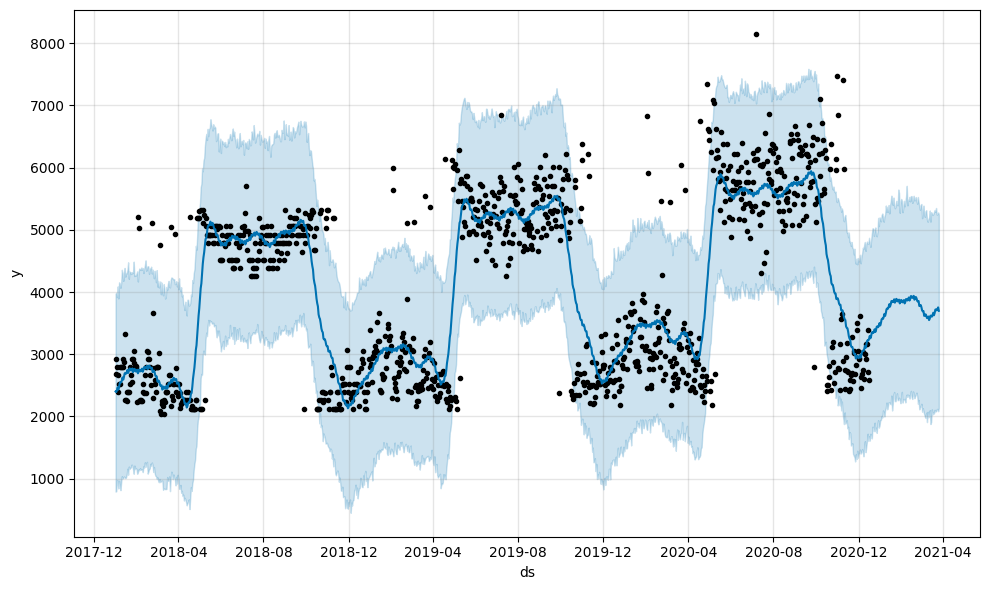

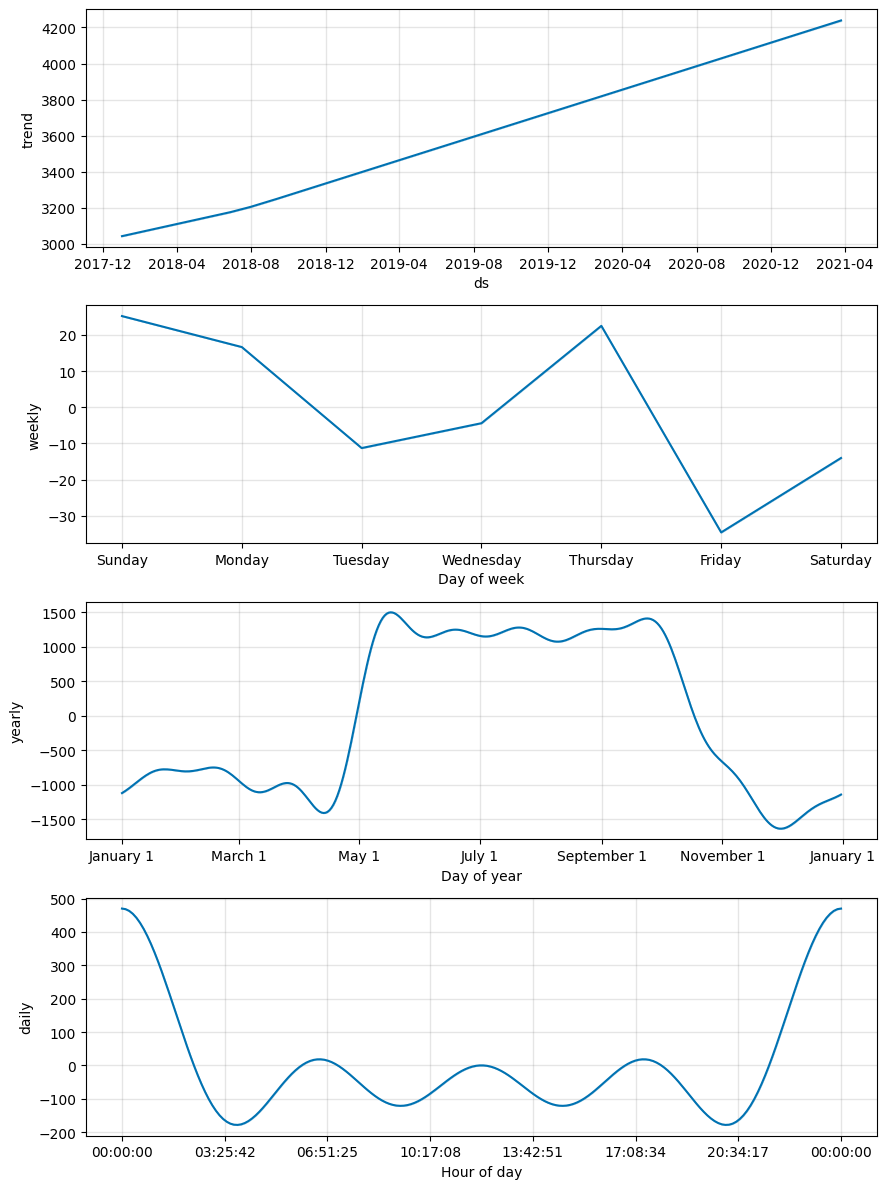

In [4]:
plot1 = m.plot(forecast)

plt2 = m.plot_components(forecast)

In [5]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

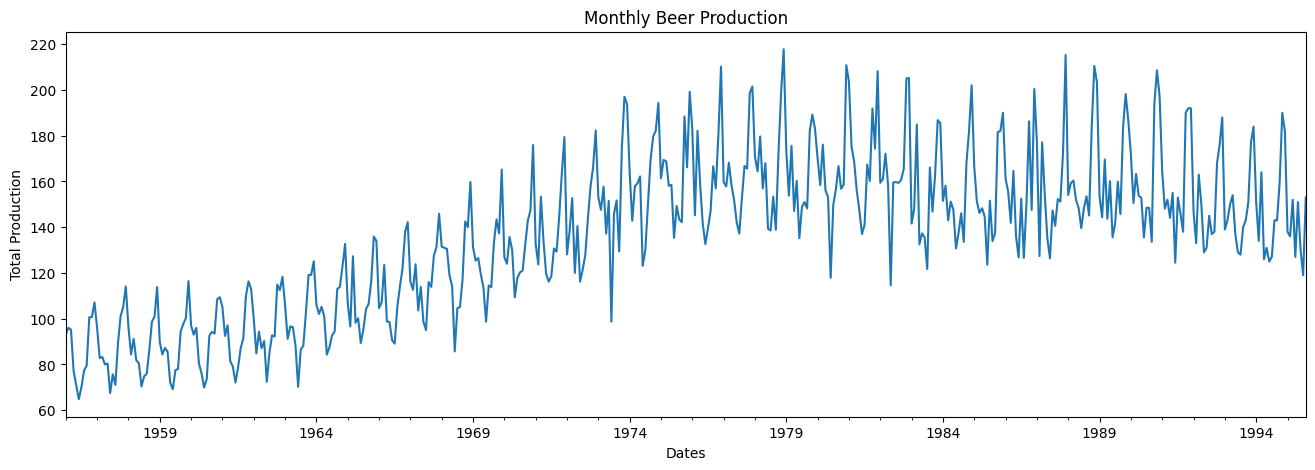

In [6]:
df = pd.read_csv('monthly-beer-production-in-austr.csv')
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
#Basic Data Plot
df.index.freq = 'MS'
ax = df['Monthly_Prod'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

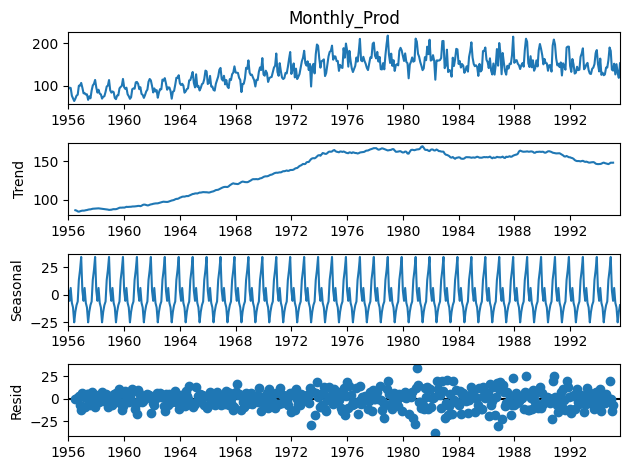

In [7]:
#Seasonal Decompose Plots
a = seasonal_decompose(df["Monthly_Prod"], model = "add")
a.plot();

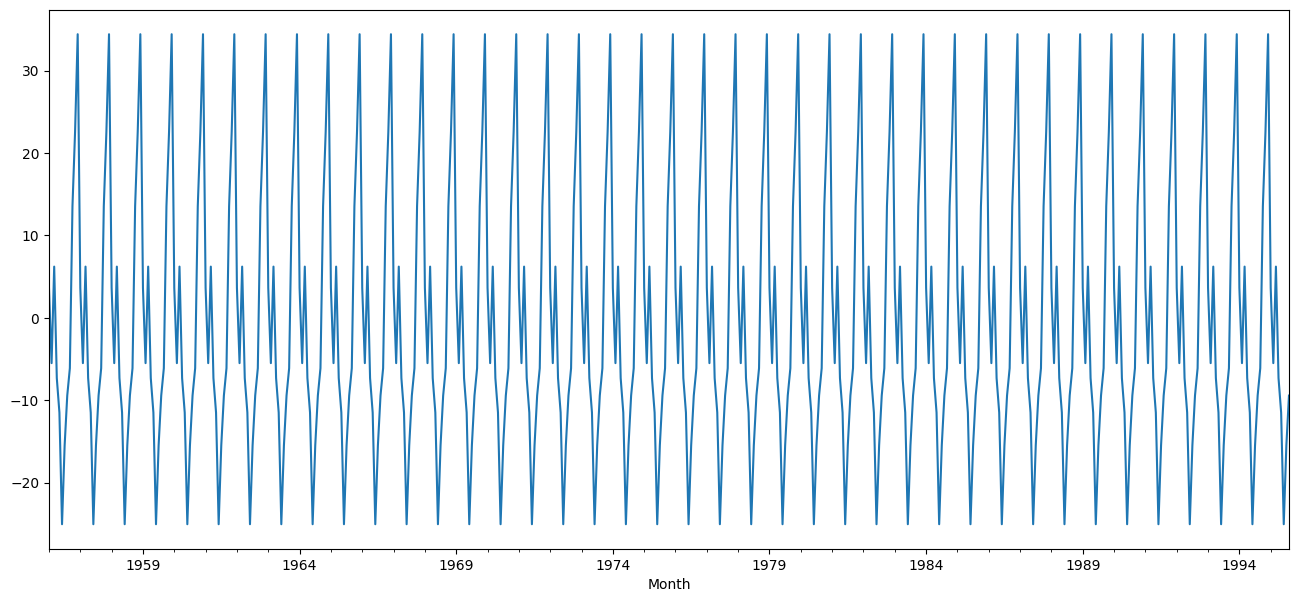

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [9]:
#ARIMA Forecast
#Finding the best values for p,q,d,P,Q,D

auto_arima(df['Monthly_Prod'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  476
Model:             SARIMAX(3, 1, 5)x(1, 0, [1, 2], 12)   Log Likelihood               -1725.548
Date:                                 Wed, 08 Mar 2023   AIC                           3475.097
Time:                                         10:21:36   BIC                           3525.056
Sample:                                     01-01-1956   HQIC                          3494.743
                                          - 08-01-1995                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3410      0.046     -7.386      0.000      -0.431      -0.250
ar.L2         -0.0622      0.053     -1.163      0.245      -0.167       0.043
ar.L3          0.8046      0.047     17.223      0.000       0.713       0.896
ma.L1         -0.6404      0.055    -11.638      0.000      -0.748      -0.533
ma.L2         -0.2969      0.039     -7.539      0.000      -0.374      -0.220
ma.L3         -0.8228      0.022    -38.038      0.000      -0.865      -0.780
ma.L4          0.7928      0.049     16.202      0.000       0.697       0.889
ma.L5          0.1194      0.045      2.658      0.008       0.031       0.207
ar.S.L12       0.9941      0.005    206.242      0.000       0.985       1.004
ma.S.L12      -0.8765      0.050    -17.628      0.000      -0.974      -0.779
ma.S.L24       0.0675      0.050      1.339      0.181      -0.031       0.166
sigma2        81.2369      4.598     17.666      0.000      72.224      90.249
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                67.46
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
#Train-Test split

train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
arima_model = SARIMAX(train_data['Monthly_Prod'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11947D+00    |proj g|=  1.61673D-01


 This problem is unconstrained.



At iterate    5    f=  4.02339D+00    |proj g|=  4.51168D-02

At iterate   10    f=  3.79643D+00    |proj g|=  5.26199D-02

At iterate   15    f=  3.75354D+00    |proj g|=  5.40234D-02

At iterate   20    f=  3.71373D+00    |proj g|=  1.09487D-02

At iterate   25    f=  3.71142D+00    |proj g|=  1.81908D-02

At iterate   30    f=  3.70374D+00    |proj g|=  9.97867D-02

At iterate   35    f=  3.68680D+00    |proj g|=  1.98344D-02

At iterate   40    f=  3.68119D+00    |proj g|=  5.39345D-03

At iterate   45    f=  3.68071D+00    |proj g|=  2.28162D-03

At iterate   50    f=  3.68006D+00    |proj g|=  2.33543D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                               Monthly_Prod   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.547
Date:                                    Wed, 08 Mar 2023   AIC                           3437.094
Time:                                            10:21:52   BIC                           3482.609
Sample:                                        01-01-1956   HQIC                          3455.012
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1345      0.040     -3.352      0.001      -0.213      -0.056
ar.L2         -0.1744      0.042     -4.200      0.000      -0.256      -0.093
ma.L1         -0.8450      0.027    -31.756      0.000      -0.897      -0.793
ar.S.L12       1.7735      0.083     21.309      0.000       1.610       1.937
ar.S.L24      -1.6549      0.147    -11.275      0.000      -1.943      -1.367
ar.S.L36       0.8196      0.106      7.708      0.000       0.611       1.028
ar.S.L48       0.0607      0.040      1.532      0.126      -0.017       0.138
ma.S.L12      -1.5718      0.102    -15.430      0.000      -1.771      -1.372
ma.S.L24       1.4420      0.160      9.016      0.000       1.129       1.755
ma.S.L36      -0.6861      0.091     -7.543      0.000      -0.864      -0.508
sigma2        84.6158      5.066     16.702      0.000      74.686      94.545
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.02
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.07   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
#Prediction
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    133.661547
1994-10-01    157.537848
1994-11-01    182.555394
1994-12-01    183.574329
1995-01-01    143.925547
1995-02-01    136.507252
1995-03-01    151.141007
1995-04-01    132.805480
1995-05-01    138.061591
1995-06-01    120.377366
1995-07-01    127.981937
1995-08-01    138.809281
Freq: MS, Name: ARIMA Predictions, dtype: float64

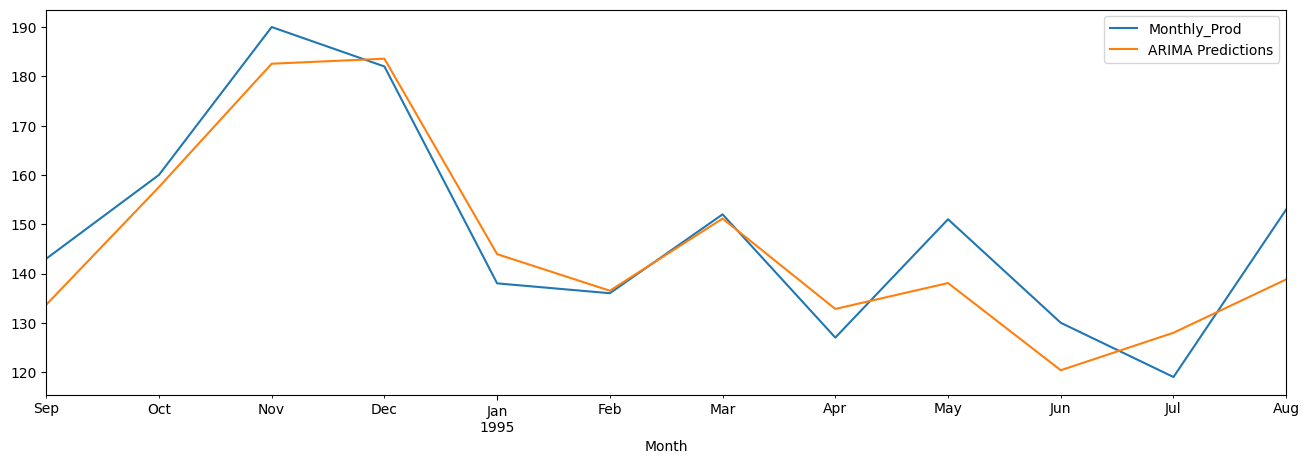

In [12]:
test_data['Monthly_Prod'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [13]:
#Model Evaluation
arima_rmse_error = rmse(test_data['Monthly_Prod'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly_Prod'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 63.58580120848168
RMSE Error: 7.974070554521178
Mean: 136.3953781512605


In [14]:

test_data['ARIMA_Predictions'] = arima_pred

In [15]:
# prophet
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [16]:
from prophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

10:21:52 - cmdstanpy - INFO - Chain [1] start processing
10:21:52 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.051172,130.674905,155.650251,151.012855,151.126776,-7.935395,-7.935395,-7.935395,-7.935395,-7.935395,-7.935395,0.0,0.0,0.0,143.115776
472,1995-05-01,150.986718,126.458949,152.460605,150.930243,151.083434,-11.400651,-11.400651,-11.400651,-11.400651,-11.400651,-11.400651,0.0,0.0,0.0,139.586067
473,1995-06-01,150.920117,114.133878,139.368014,150.843449,151.042510,-23.933983,-23.933983,-23.933983,-23.933983,-23.933983,-23.933983,0.0,0.0,0.0,126.986133
474,1995-07-01,150.855663,123.061510,147.129903,150.747288,151.017343,-15.749587,-15.749587,-15.749587,-15.749587,-15.749587,-15.749587,0.0,0.0,0.0,135.106077
475,1995-08-01,150.789061,128.558850,153.941042,150.654447,150.985636,-9.223618,-9.223618,-9.223618,-9.223618,-9.223618,-9.223618,0.0,0.0,0.0,141.565443


In [17]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
1994-09-01,144.998459
1994-10-01,165.994704
1994-11-01,173.634973
1994-12-01,185.883532
1995-01-01,155.173324
1995-02-01,146.726147
1995-03-01,158.821715
1995-04-01,143.115776
1995-05-01,139.586067


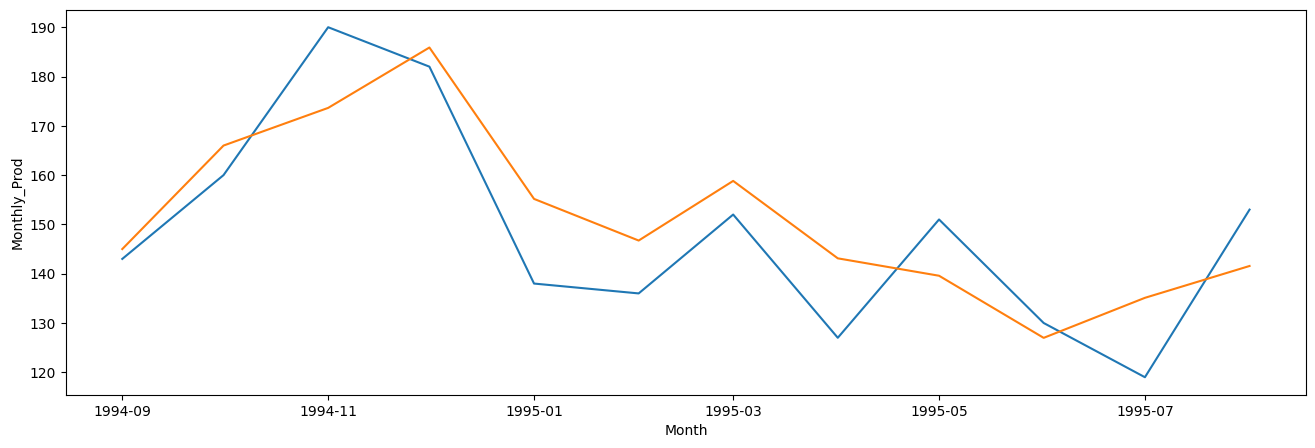

In [19]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly_Prod"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [20]:
prophet_rmse_error = rmse(test_data['Monthly_Prod'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly_Prod'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 130.71413664029123
RMSE Error: 11.433028323252385
Mean: 136.3953781512605


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


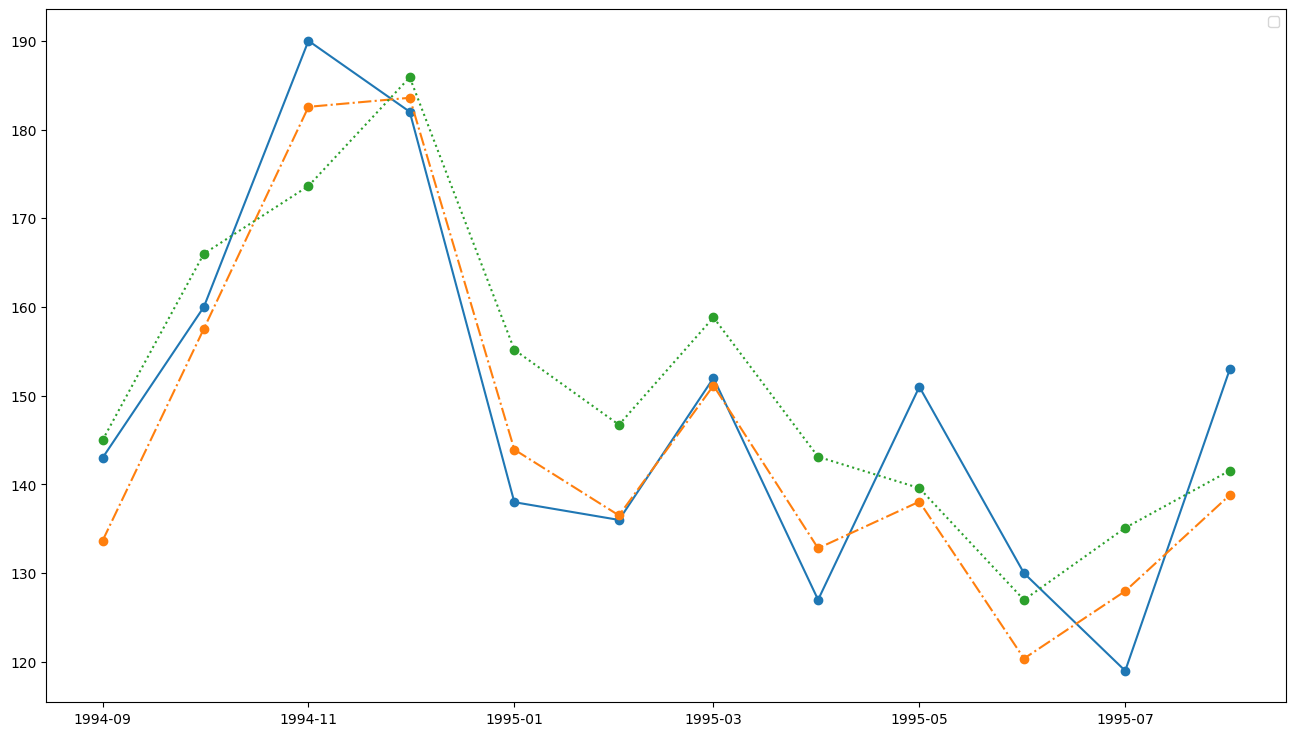

In [21]:
#Comparison

rmse_errors = [arima_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly_Prod"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [22]:
print(f"Mean: {test_data['Monthly_Prod'].mean()}")
errors


Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,7.974071,63.585801
1,Prophet,11.433028,130.714137


In [23]:
#Final Prediction data
test_data

,Monthly_Prod,ARIMA_Predictions,Prophet_Predictions
Month,,,
1994-09-01,143.0,133.661547,144.998459
1994-10-01,160.0,157.537848,165.994704
1994-11-01,190.0,182.555394,173.634973
1994-12-01,182.0,183.574329,185.883532
1995-01-01,138.0,143.925547,155.173324
1995-02-01,136.0,136.507252,146.726147
1995-03-01,152.0,151.141007,158.821715
1995-04-01,127.0,132.805480,143.115776
1995-05-01,151.0,138.061591,139.586067
